# Explore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle_victoire_
import env

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

**Get data**

In [2]:
# load cleaned data
codeup = wrangle_victoire_.wrangle_codeup()
codeup.head()

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
codeup[codeup.id == 135]

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip,lesson
799199,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-01-26,12:18:57,toc,861,135.0,96.8.248.149,NaN
799219,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-01-26,12:21:01,toc,864,135.0,74.76.254.34,NaN
799231,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-01-26,12:21:14,appendix,867,135.0,99.76.131.43,NaN
799232,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-01-26,12:21:16,toc,865,135.0,71.146.119.5,NaN
799234,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-01-26,12:21:17,html-css,867,135.0,99.76.131.43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900206,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-04-21,16:33:58,javascript-i/bom-and-dom/bom,876,135.0,98.6.122.83,javascript-i
900208,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-04-21,16:34:06,javascript-i/bom-and-dom/dom,876,135.0,98.6.122.83,javascript-i
900209,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-04-21,16:35:44,javascript-i/bom-and-dom/dom-events,875,135.0,24.242.150.231,javascript-i
900210,135.0,Marco,#marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,None,2.0,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,jquery


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [3]:
# drop nulls in the path column
codeup = codeup[~codeup.path.isna()]
# remove bad urls from path
codeup = codeup[~codeup.path.isin(["/"])]

In [4]:
# not doing this because the files are located in a main path which I now consider the lesson
# # remove all rows that contains file path ending because they are not lessons
# file_type = "|".join([".jpg", ".jpeg", ".svg", ".json", ".ico", ".html"])
# codeup = codeup[~codeup["path"].str.contains(file_type, case=False)]

In [5]:
# create a lesson column
codeup["lesson"] = codeup.path.str.extract('^(.*?)(?=\/)')

**solution**

In [6]:
# Group by program_id, cohort_id, and lesson, then count the occurrences of each lesson
lesson_counts = codeup.groupby(["program_id","cohort_id", "lesson"])["lesson"].count().reset_index(name="referred_to_lesson_count")

lesson_counts.head()

,program_id,cohort_id,lesson,referred_to_lesson_count
0,1.0,1.0,appendix,260
1,1.0,1.0,assets,9
2,1.0,1.0,cohorts,9
3,1.0,1.0,content,277
4,1.0,1.0,examples,121


In [7]:
# Find the top lesson counts in each cohort_id within each program_id
results = lesson_counts.sort_values(by=["program_id","cohort_id", "referred_to_lesson_count"], ascending=[True,True,False]).groupby(["cohort_id"]).head(1)

# save to csv file
results.to_csv("01_lesson_with_most traffic.csv", mode="w")

### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [8]:
# Group by program_id, cohort_id, and lesson, then count the occurrences of each lesson
lesson_counts = codeup.groupby(["cohort_id", "lesson"])["lesson"].count().reset_index(name="referred_to_lesson_count")

lesson_counts.head()

,cohort_id,lesson,referred_to_lesson_count
0,1.0,appendix,260
1,1.0,assets,9
2,1.0,cohorts,9
3,1.0,content,277
4,1.0,examples,121


In [9]:
plt.figure(figsize=(12,4))
lesson_counts.lesson.value_counts()

appendix                             41
search                               41
javascript-i                         39
html-css                             39
java-i                               38
                                     ..
8-timeseries                          1
8_Exercises                           1
9-anomaly-detection                   1
Classification_DecisionTree_files     1
tools                                 1
Name: lesson, Length: 118, dtype: int64

<Figure size 1200x400 with 0 Axes>

In [10]:
# Find the top ten lesson counts in each cohort_id within each program_id
top_5_in_cohort = lesson_counts.sort_values(by=["cohort_id", "referred_to_lesson_count"], ascending=[True,False]).groupby(["cohort_id"]).head(5)
top_5_in_cohort

,cohort_id,lesson,referred_to_lesson_count
9,1.0,javascript-i,1039
5,1.0,html-css,816
17,1.0,spring,722
13,1.0,mysql,680
8,1.0,java-iii,543
...,...,...,...
969,139.0,javascript-i,1195
964,139.0,appendix,47
971,139.0,search,9
968,139.0,java-iii,2


Text(0, 0.5, 'referred javascript-i count')

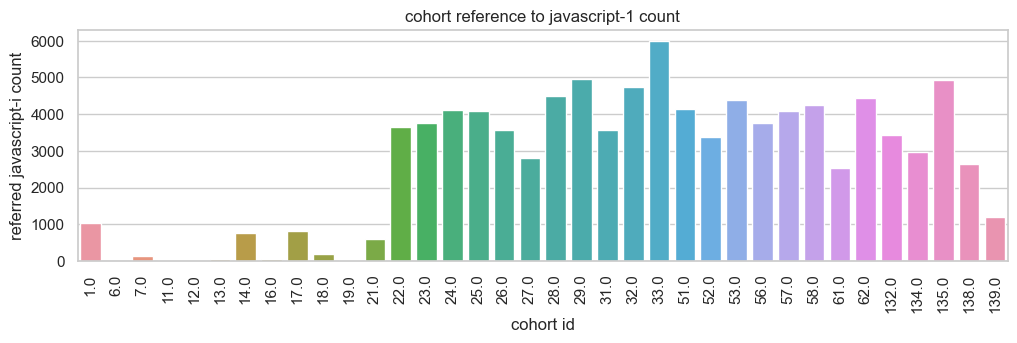

In [11]:
# look at one lesson to compare top results
plt.figure(figsize=(12,3))
results = top_5_in_cohort[top_5_in_cohort.lesson == "javascript-i"][["cohort_id","referred_to_lesson_count"]].sort_values(by="cohort_id").set_index("cohort_id")
sns.barplot(x=results.index, y=results.referred_to_lesson_count)
plt.xticks(rotation=90)
plt.title("cohort reference to javascript-1 count")
plt.xlabel("cohort id")
plt.ylabel("referred javascript-i count")